# Uso y aplicación de los métodos de agrupamiento


# Organización de documentos mediante clustering

El Clustering Documental consiste en organizar un conjunto de documentos en una serie de categorías coherentes. Esta técnica se encuentra dentro del ámbito de la Minería de Textos, y es una tarea muy útil para la navegación sistemática sobre la colección de los documentos.
Otras aplicaciones que tiene el clustering de documentos son:
- Recuperación de Información.
- Derivar información nueva de los textos.
- Extracción de información oculta y predecible de grandes bases de datos.
- Minería de opinión.
- Etc.

En esta técnica, cada documento puede ser representado ya sea en forma binaria, mostrando la presencia o ausencia de una palabra en el comento para crear un vector binario. Otra manera consiste en asignar una serie de pesos en base a la frecuencia de aparición de cada palabra en el documento, o incluso en la colección completa.
Además de la creación del vector de características, se suele realizar un preprocesado de cada texto, como la eliminación de Stop Words, Lemmatization o Stemming, etc. También se suelen descartar aquellas palabras con frecuencias de aparición muy altas o muy bajas, ya que se las considera poco representativas.


## Descripción del Dataset

El dataset utilizado para la realización de esta práctica ha sido extraído de https://archive.ics.uci.edu/ml/datasets/Bag+of+Words. Consiste en cinco colecciones de textos representados por sus respectivos vectores. De estas cinco colecciones de textos se ha seleccionado la denominada como KOS blog entries.
Dicha colección está formada por 3430 documentos, donde cada documento está representado por un vector de 6906 palabras.
El formato del dataset consiste en 3 líneas de cabecera que muestran el número de documentos, el tamaño del vector y el número total de palabras, seguidas de tripletas con la forma (id del documento, id de la palabra, conteo de palabras).
Por último, para la creación de este dataset se ha realizado tokenización de los textos y se han eliminado las stopwords. Además, sólo se han utilizado aquellas palabras que aparecen más de diez veces.


## Carga de los datos
A continuación se procede a cargar los datos en forma de matriz. Se van a crear dos matrices, una en formato binario y otra en formato de frecuencias.

In [1]:
import numpy as np

documentsBin = []
documentsFrec = []
fileDocuments = open("dataset_clustering_documental/docword.kos.txt", "r")
lineCount = 0
numberOfDocuments = 0
numberOfWords = 0
numberOfTotalWords = 0
for line in fileDocuments:
    if lineCount == 0:
        numberOfDocuments = int(line)
        print("Numero de documentos totales: ",numberOfDocuments)
    elif lineCount == 1:
        numberOfWords = int(line)
        print("Numero de palabras: ",numberOfWords)
        documentsBin = np.zeros((numberOfDocuments,numberOfWords),dtype=int)
        documentsFrec = np.zeros((numberOfDocuments,numberOfWords),dtype=int)
    elif lineCount == 2:
        numberOfTotalWords = int(line)
        print("Total de ocurrencias de palabras: ",numberOfTotalWords)
    else:
        docId, wordId, count = line.split(" ")
        documentsFrec[int(docId) - 1][int(wordId) - 1] = count
        documentsBin[int(docId) - 1][int(wordId) - 1] = 1
    lineCount += 1
fileDocuments.close()

Numero de documentos totales:  3430
Numero de palabras:  6906
Total de ocurrencias de palabras:  353160


Se procede a realizar una reducción de la dimensión del vector de características para optimizar el rendimiento de los algoritmos. Se entiende que al reducir la dimensionalidad de los vectores, podría decirse que los documentos se acercan más entre ellos.

In [2]:
from sklearn.decomposition import PCA

def reduccionDimensionalidad(documentos, dim):
    pca = PCA(n_components=dim)
    return pca.fit_transform(documentos)

In [3]:
documentsBin100 = reduccionDimensionalidad(documentsBin,100)
documentsFrec100 = reduccionDimensionalidad(documentsFrec,100)

## Algoritmo K-means
Se trata de un algoritmo iterativo que inicialmente crea K clústeres y reconsidera la asignación de ejemplos a los K clústeres en cada iteración hasta que se llega a la convergencia.

### Eleccion de K
Como se ha visto durante el desarrollo de la asignatura, la elección del número de clústeres es fundamental para obtener un buen resultado en el agrupamiento. Para ello, se va a utilizar el procedimiento del codo.

In [110]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib notebook

def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    
    return interior/sumTotal

def calculoDeK(documentos):
    rrsquare = np.zeros(9)
    for k in np.arange(2,11):
        modelo = KMeans(n_clusters=k)
        modelo = modelo.fit(documentos)
        predicciones = modelo.predict(documentos)
        centroides = modelo.cluster_centers_
        rrsquare[k-2]  = medida_R_cuadrado(documentos, predicciones, centroides)

    fig, ax = plt.subplots(1,1,figsize=(15,5))

    ax.plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
    ax.set_xlabel("Número de clústeres")
    ax.set_ylabel("Medida de R cuadrado")
    return fig

In [ ]:
print("Calculando K para el array binario")
figBin = calculoDeK(documentsBin)
figBin.show()

Calculando K para el array binario


Después de varias ejecuciones de calculoDeK, se puede ver como siempre el mejor valor es siempre 3 para el array binario. Después, dependiendo de la ejecución, la medida permanece estable o incluso aumenta.

Calculando K para el array binario reducido


<IPython.core.display.Javascript object>


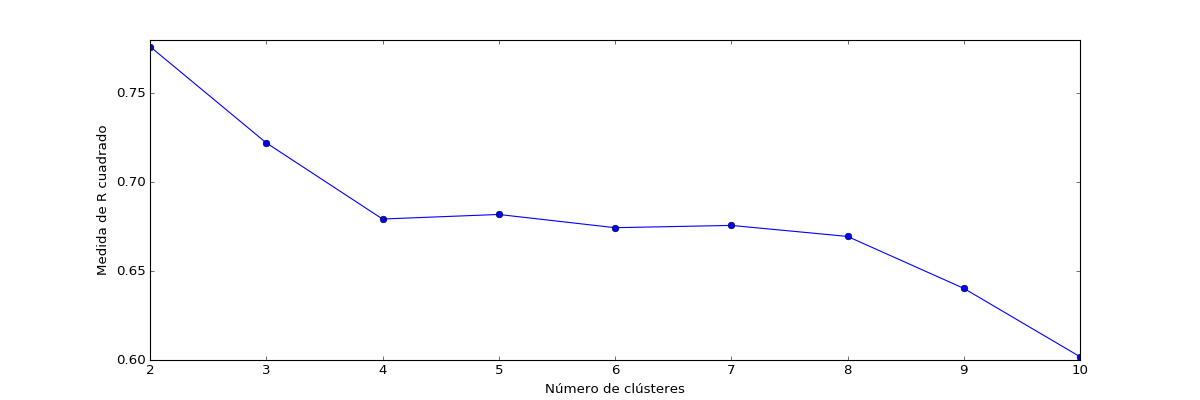

In [65]:
print("Calculando K para el array binario reducido")
figBin = calculoDeK(documentsBin100)
figBin.show()

Después de varias ejecuciones de calculoDeK, se puede ver como el codo son 4 clústers. Además, se aprecia que utilizando sólo 100 características la velocidad de ejecución es sustancialmente menor.

In [ ]:
print("Calculando K para el array de frecuencias")
figFrec = calculoDeK(documentsFrec)
figFrec.show()

Para el caso del array de frecuencias, se puede observar como el codo se encuentra en los 6 clústeres.
A continuación, se va a proceder a ejecutar el algoritmo k-means con los K calculados en esta sección.

Calculando K para el array de frecuencias reducido


<IPython.core.display.Javascript object>


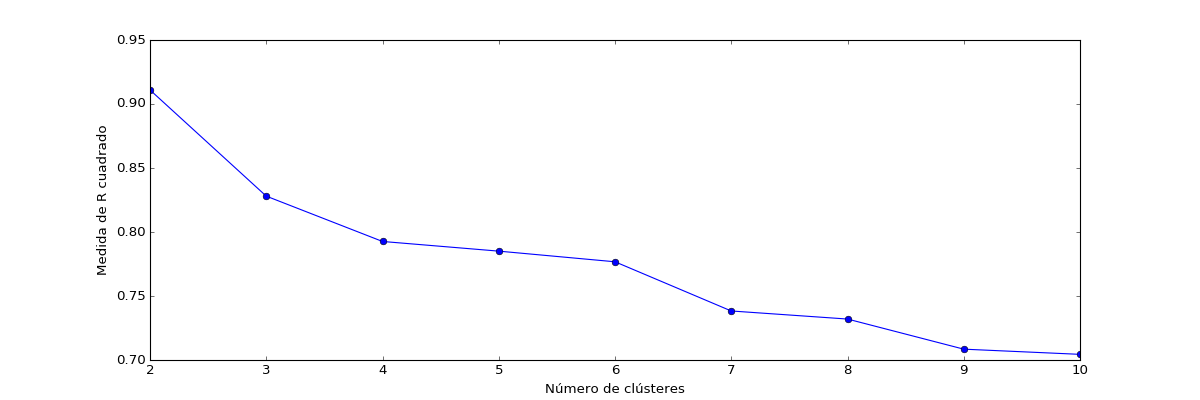

In [66]:
print("Calculando K para el array de frecuencias reducido")
figFrec = calculoDeK(documentsFrec100)
figFrec.show()

Después de varias ejecuciones de calculoDeK, se puede ver como el codo son 4 clústers. Además, se aprecia que utilizando sólo 100 características la velocidad de ejecución es sustancialmente menor.

### Ejecucion del algoritmo K-means

In [68]:
def ejecucionKMeans(documentos, clusteres):
    modelo = KMeans(n_clusters=5)
    modelo = modelo.fit(documentos)
    prediccion = modelo.predict(documentos)
    centroides = modelo.cluster_centers_
    return centroides, prediccion

In [17]:
centrosBinarios, prediccionBinarios = ejecucionKMeans(documentsBin, 3)
print("Centros encontrados: ",centrosBinarios)
for clust in range(3):
    grupo = [index+1 for index, pred in enumerate(prediccionBinarios) if pred == clust]
    print("Documentos del grupo ", clust,":", len(grupo), grupo)

Centros encontrados:  [[  2.81892565e-18   4.09836066e-03   1.22950820e-02 ...,   1.22950820e-02
    1.22950820e-02   4.09836066e-03]
 [  1.06157113e-03   4.24628450e-03   2.12314225e-03 ...,   1.11464968e-02
    7.43099788e-03   1.06157113e-03]
 [  1.40946282e-18   1.68302945e-02   9.81767181e-03 ...,   7.01262272e-03
    1.12201964e-02   2.80504909e-03]
 [  1.99203187e-03   1.19521912e-02   1.79282869e-02 ...,   1.99203187e-03
    2.58964143e-02   1.19521912e-02]
 [  1.08420217e-19   0.00000000e+00  -2.60208521e-18 ...,   8.67361738e-18
    1.14942529e-02   1.14942529e-02]]
Documentos del grupo  0 : 244 [3, 12, 24, 35, 45, 58, 69, 80, 90, 100, 113, 126, 141, 151, 163, 175, 187, 194, 203, 212, 220, 231, 242, 252, 262, 272, 281, 292, 302, 311, 321, 331, 343, 353, 365, 377, 388, 398, 409, 422, 436, 446, 458, 469, 481, 493, 505, 516, 529, 540, 553, 566, 580, 593, 606, 619, 629, 642, 651, 662, 674, 685, 699, 710, 721, 733, 744, 756, 767, 778, 792, 801, 814, 825, 835, 847, 858, 868, 880, 8

In [69]:
centrosBinarios100, prediccionBinarios100 = ejecucionKMeans(documentsBin100, 4)
print("Centros encontrados: ",centrosBinarios100)
for clust in range(3):
    grupo = [index+1 for index, pred in enumerate(prediccionBinarios100) if pred == clust]
    print("Documentos del grupo ", clust,":", len(grupo), grupo)

Centros encontrados:  [[ -8.97070160e-01   1.70869921e+00   3.19575022e-01  -1.02133526e+00
    2.32934019e-01   1.78653980e-01  -1.13115004e-01  -1.05251959e-01
   -1.28528237e-01  -1.14908698e-01   7.91570934e-02  -4.81071088e-02
   -6.48438449e-02   3.96433087e-02   5.54914454e-02   7.90729312e-02
    2.50300003e-02  -1.69550636e-02  -2.06090071e-02  -5.79359039e-02
   -2.04684496e-02  -5.02685357e-02   3.35526412e-02  -1.50979122e-03
   -1.08418689e-02   3.20221076e-04   1.12136782e-02   2.33196603e-04
    1.30131546e-02  -5.06322761e-03  -2.98280862e-02  -3.15824683e-02
   -2.04254790e-02  -2.42872437e-02   1.61331783e-02  -1.48743070e-02
   -2.00780569e-02   2.62639739e-02   7.83831691e-03   1.79949070e-02
   -1.86547398e-02  -2.12213558e-02  -4.37937307e-03   1.26365234e-02
   -2.79928929e-03  -1.46740420e-03  -7.38420292e-03   1.22174775e-02
    2.02402090e-02   7.48919309e-04   2.19587069e-02  -2.10755632e-02
    5.03829682e-03   2.10857780e-02   1.08526098e-03   2.43122943e-0

In [12]:
centrosFrec, prediccionFrec = ejecucionKMeans(documentsFrec, 6)
print("Centros encontrados: ",centrosFrec)
for clust in range(3):
    grupo = [index+1 for index, pred in enumerate(prediccionFrec) if pred == clust]
    print("Documentos del grupo ", clust,":", len(grupo), grupo)

Centros encontrados:  [[  2.60208521e-18   3.02114804e-03   9.06344411e-03 ...,   1.20845921e-02
    1.20845921e-02   6.04229607e-03]
 [  6.46551724e-03   1.29310345e-02   1.07758621e-02 ...,   8.62068966e-03
    1.93965517e-02   6.46551724e-03]
 [  7.37257477e-18   1.42857143e-02   1.42857143e-02 ...,   4.76190476e-03
    1.42857143e-02   7.37257477e-18]
 [  0.00000000e+00   1.77514793e-02   1.77514793e-02 ...,   3.55029586e-02
    5.91715976e-03   0.00000000e+00]
 [  3.98936170e-03   6.64893617e-03   4.87588652e-03 ...,   7.53546099e-03
    1.41843972e-02   3.10283688e-03]]
Documentos del grupo  0 : 331 [3, 12, 13, 24, 35, 45, 58, 69, 80, 90, 100, 113, 126, 129, 141, 148, 151, 163, 175, 187, 194, 203, 212, 220, 231, 233, 242, 252, 262, 272, 281, 292, 302, 311, 321, 331, 334, 343, 353, 365, 377, 388, 398, 409, 422, 436, 446, 449, 458, 469, 481, 493, 505, 516, 529, 540, 553, 566, 569, 580, 593, 606, 619, 629, 642, 651, 662, 674, 685, 687, 699, 710, 721, 733, 744, 756, 767, 778, 792, 80

In [70]:
centrosFrec100, prediccionFrec100 = ejecucionKMeans(documentsFrec100, 4)
print("Centros encontrados: ",centrosFrec100)
for clust in range(3):
    grupo = [index+1 for index, pred in enumerate(prediccionFrec100) if pred == clust]
    print("Documentos del grupo ", clust,":", len(grupo), grupo)

Centros encontrados:  [[ -1.94817213e+00  -1.08519692e+00  -5.23651547e-01  -3.38030616e-01
   -3.06746125e-02   6.69513238e-02  -2.57414060e-02   7.54762467e-02
   -7.33090493e-03  -2.39740292e-03  -3.84590372e-02   4.99393595e-03
    2.68481855e-02  -1.23841511e-02   2.82550504e-02   4.88858019e-03
   -1.70594146e-02  -5.60209384e-03   2.18022837e-02  -9.75715844e-03
    1.46714103e-02   1.29498134e-03   3.11842021e-02   1.13203102e-03
    1.92568685e-02   2.18722734e-02  -3.83026338e-02   5.03935939e-03
   -6.47046545e-03  -5.20368786e-03  -1.40396111e-02   1.54547558e-02
   -2.05908552e-02   2.69717741e-02  -1.69465435e-02   8.88908389e-03
    1.74986426e-03   1.48216034e-02  -2.62251004e-03  -9.27790262e-03
    1.38314783e-02   2.08763456e-03  -1.18152999e-02  -1.96887159e-02
   -4.55450814e-03  -7.56408799e-03  -1.51046081e-02   1.18712404e-02
   -3.02707082e-03  -8.20169008e-03   2.26591414e-02   8.90941771e-03
   -1.02137426e-02   4.62086605e-03   2.30694248e-03  -1.05585296e-0

### Evaluacion del algoritmo K-means
A continuación se procederá a evaluar los resultados para el algoritmo K-means según las métricas intrínsecas.
Se han elegido las siguientes medidas:
- Medida R-cuadrado: mide cuán homogéneos son los clústers.
- RMSSTD: Mide lo heterogéneos que son los clústers.
- Silueta: Expresa la diferencia entre la distancia intracluster y la intercluster. Toma valores en [-1,1]. Cuanto más cercano sea su valor a uno, mejor será el conjunto generado.
- Indice Calinski-Harabasz: Suma promedio de las distancias inter e intracluster al cuadrado. A mayor valor, mejor agrupamiento.
- Indice I: Mide la separacion intercluster con respecto a la homogeneidad intracluster. A mayor valor, mejor agrupamiento.
- Medida Davies-Bouldin: Expresa el ratio entre la distancia intercluster y la intracluster. Valores pequeños para esta medida indican clústeres compactos y cuyos centros están bien separados los unos de los otros.

Para la evaluación, se han utilizado algunas de las funciones desarrolladas en clase y las que están contenidas en la librería sklearn.

In [37]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score
import itertools as it

def medida_RMSSTD(X, Xyp, cXs):
    labels = np.unique(Xyp)
    num = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    den = X.shape[1] * np.sum([np.sum(Xyp==labels[k])-1 for k in np.arange(labels.size)])

    return np.sqrt(num/den)

def medida_I(X, Xyp, cXs, distancia):
    cXglob = np.mean(X, axis = 0) 
    labels = np.sort(np.unique(Xyp))
    maxDcs = np.max(matriz_distancias(cXs, distancia))

    num = np.sum([distancia(X[i,:], cXglob) for i in np.arange(X.shape[0])])

    den = labels.size * np.sum([np.sum([distancia(X[i,:], cXs[k,:])
                                        for i in np.arange(X.shape[0])[Xyp==labels[k]]])
                                for k in np.arange(cXs.shape[0])])
    return ((num/den)*maxDcs)

def medida_davies_bouldin(X, Xyp, cXs, distancia):
    labels = np.sort(np.unique(Xyp))
    mDcs = matriz_distancias(cXs, distancia)
    np.fill_diagonal(mDcs, np.Infinity)

    vals = np.array([1.0 / np.sum(Xyp==labels[k]) * np.sum([distancia(X[i,:], cXs[k,:])
                                                            for i in np.arange(X.shape[0])[Xyp==labels[k]]])
                     for k in np.arange(cXs.shape[0])])
    res = 1.0/labels.size*np.sum([np.max([(vals[k]+vals[kp])/mDcs[k,kp] 
                                          for kp in np.arange(labels.size)])
                                  for k in np.arange(labels.size)])
    return res

def distancia_euclidiana(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def evaluarClusters(nombre, documentos, prediccion, centroides):
    print('Medida silueta-',nombre,":",silhouette_score(documentos,prediccion))
    print('Indice Calinski-Harabasz-',nombre,":",calinski_harabaz_score(documentos, prediccion))
    print('Indice I-',nombre,":",medida_I(documentos, prediccion, centroides, distancia_euclidiana))
    print('Medida Davies-Bouldin-',nombre,":",medida_davies_bouldin(documentos, prediccion, centroides, distancia_euclidiana))
    print('Medida RMSSTD-',nombre,":",medida_RMSSTD(documentos, prediccion, centroides))
    print('Medida R Cuadrado-',nombre,":",medida_R_cuadrado(documentos, prediccion, centroides))

In [30]:
evaluarClusters("bin", documentsBin, prediccionBinarios, centrosBinarios)

Medida silueta- bin : 0.0832088883094
Indice Calinski-Harabasz- bin : 101.3873025
Indice I- bin : 2.25137181144
Medida Davies-Bouldin- bin : 6.00912533329
Medida RMSSTD- bin : 0.49419682089
Medida R Cuadrado- bin : 0.378861134056


In [71]:
evaluarClusters("bin100", documentsBin100, prediccionBinarios100, centrosBinarios100)

Medida silueta- bin100 : 0.144664622906
Indice Calinski-Harabasz- bin100 : 441.354390887
Indice I- bin100 : 2.48602705069
Medida Davies-Bouldin- bin100 : 2.98240952906
Medida RMSSTD- bin100 : 0.457989519343
Medida R Cuadrado- bin100 : 0.684056922734


In [31]:
evaluarClusters("frec",documentsFrec, prediccionFrec, centrosFrec)

Medida silueta- frec : 0.158650441618
Indice Calinski-Harabasz- frec : 124.056951767
Indice I- frec : 3.75702472142
Medida Davies-Bouldin- frec : 3.78486300553
Medida RMSSTD- frec : 0.936442600435
Medida R Cuadrado- frec : 0.645464496154


In [72]:
evaluarClusters("frec100",documentsFrec100, prediccionFrec100, centrosFrec100)

Medida silueta- frec100 : 0.263034492327
Indice Calinski-Harabasz- frec100 : 298.81140927
Indice I- frec100 : 4.09129365528
Medida Davies-Bouldin- frec100 : 2.52916400853
Medida RMSSTD- frec100 : 1.0154525846
Medida R Cuadrado- frec100 : 0.782459319132


Según todas las medidas, se puede observar que el agrupamiento generado por los documentos en formato de frecuencia es mejor que el representado por el array binario, debido a lo expuesto en la explicación de cada medida.

Además, se puede observar cómo los datasets cuya dimensionalidad ha sido reducida obtienen mejores resultados que sus versiones originales.

## Clustering Jerárquico - Clustering Aglomerativo
Este tipo de clustering busca una jerarquía de clústeres, que puede entenderse como una evolución o secuencia ordenada del agrupamiento desde K = 1.
La aproximación que se va a utilizar comienza creando n clusteres y asignando cada ejemplo de entrenamiento a cada uno de ellos. A cada paso, se seleccionan dos con la menor disimilitud interclúster entre ellos y se combinan. Este proceso se repite hasta que se fusionan los dos últimos clústeres.
Esta información va a ser representada por medio de dendogramas, 
Para realizar este apartado se han utilizado las herramientas de scipy.

In [34]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import sys as sys

sys.setrecursionlimit(10000)

def calcularClusteringJerarquico(documentos, truncar = None, level = 0):
    Z = linkage(documentsBin)
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z,leaf_rotation=90.,leaf_font_size=8., truncate_mode=truncar, p=level)
    plt.show()
    return Z

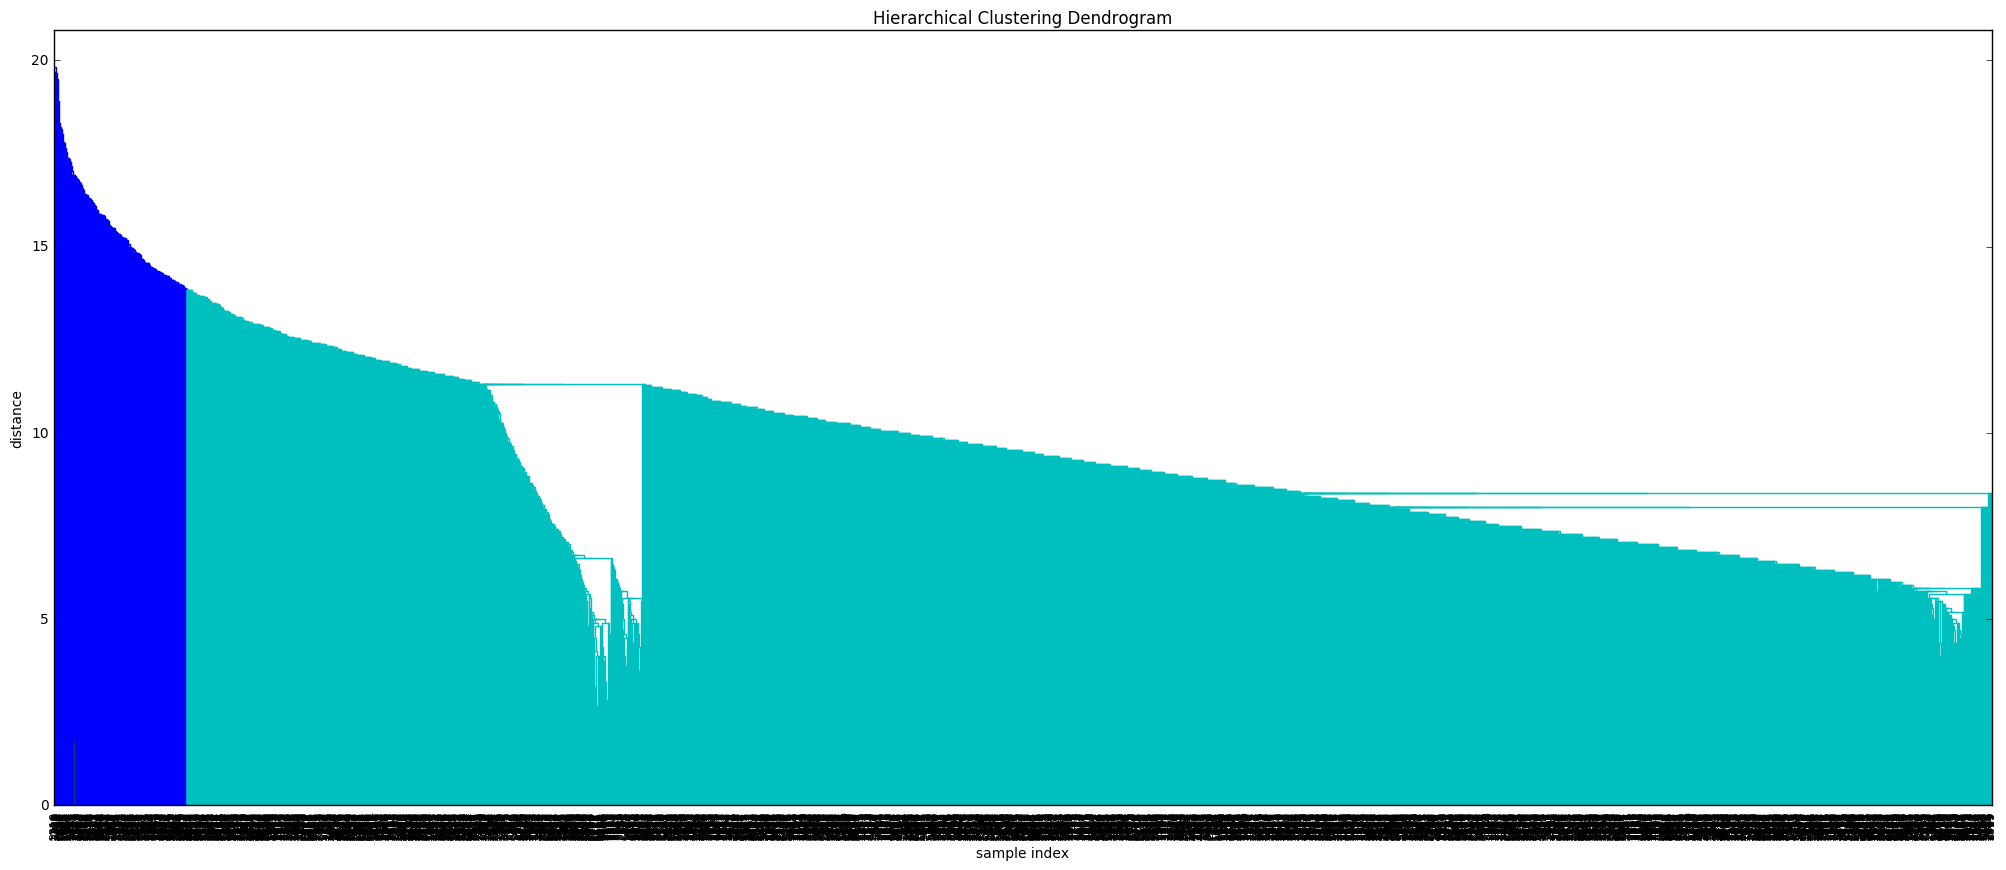

In [10]:
calcularClusteringJerarquico(documentsBin)

<IPython.core.display.Javascript object>


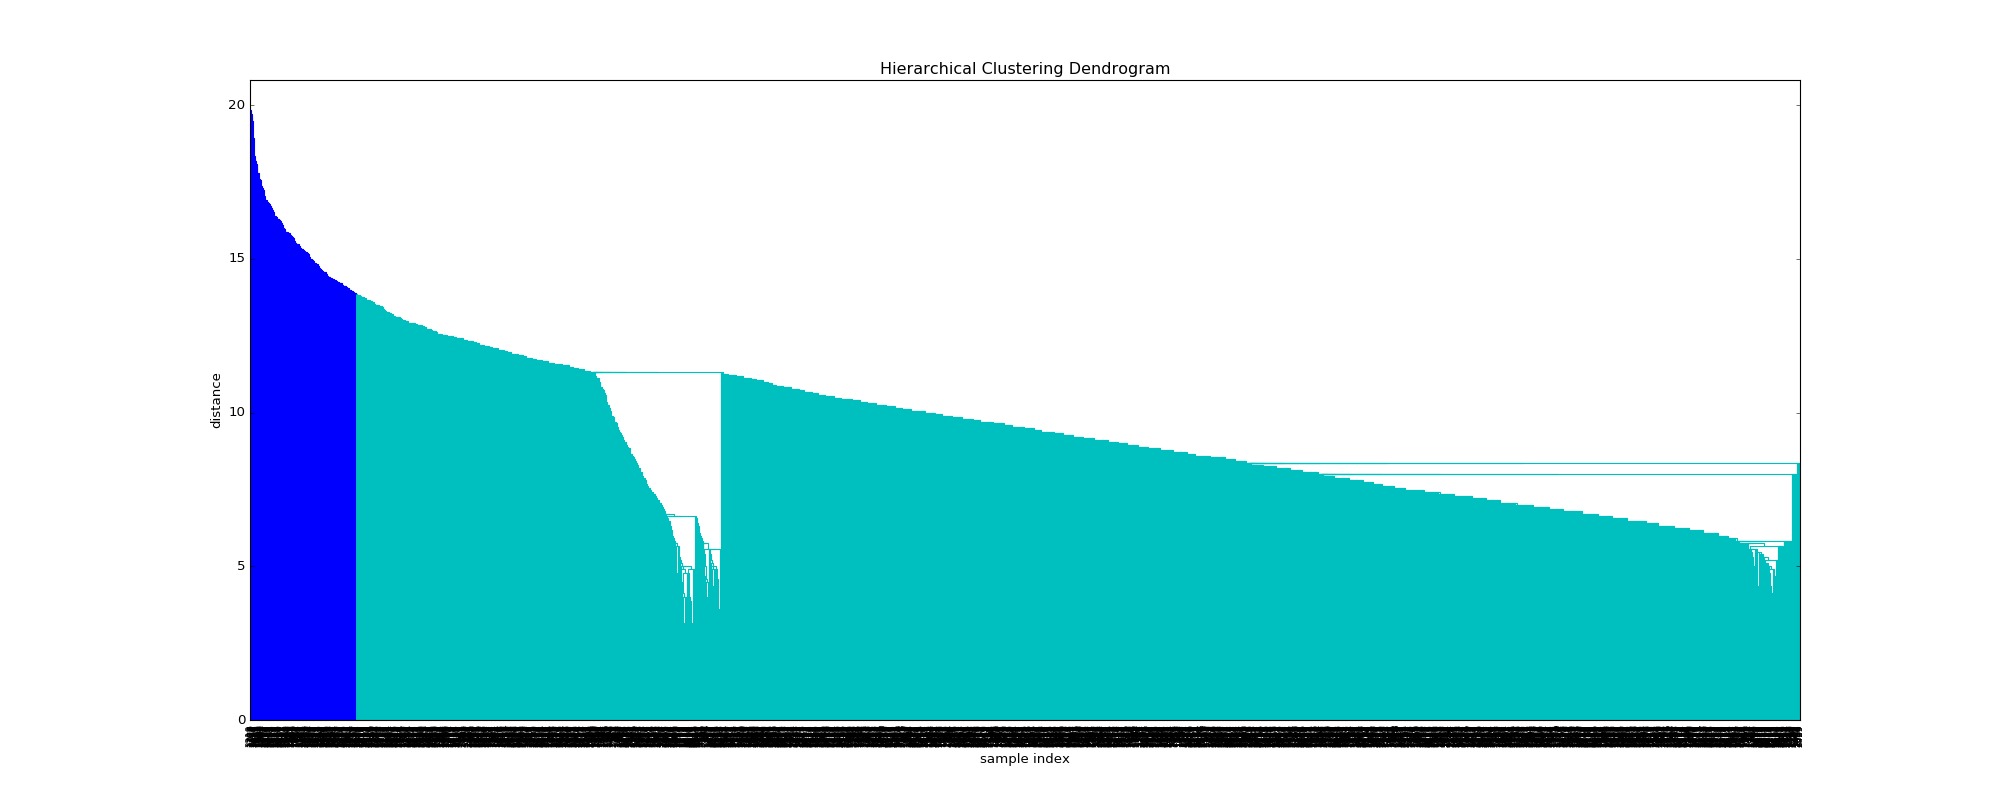

array([[  2.37700000e+03,   2.37800000e+03,   1.73205081e+00,
          2.00000000e+00],
       [  1.61300000e+03,   1.62600000e+03,   2.23606798e+00,
          2.00000000e+00],
       [  2.03600000e+03,   2.27600000e+03,   2.23606798e+00,
          2.00000000e+00],
       ..., 
       [  1.19600000e+03,   6.85500000e+03,   1.96723156e+01,
          3.42800000e+03],
       [  1.73800000e+03,   6.85600000e+03,   1.96977156e+01,
          3.42900000e+03],
       [  3.21900000e+03,   6.85700000e+03,   1.98242276e+01,
          3.43000000e+03]])

In [73]:
calcularClusteringJerarquico(documentsBin100)

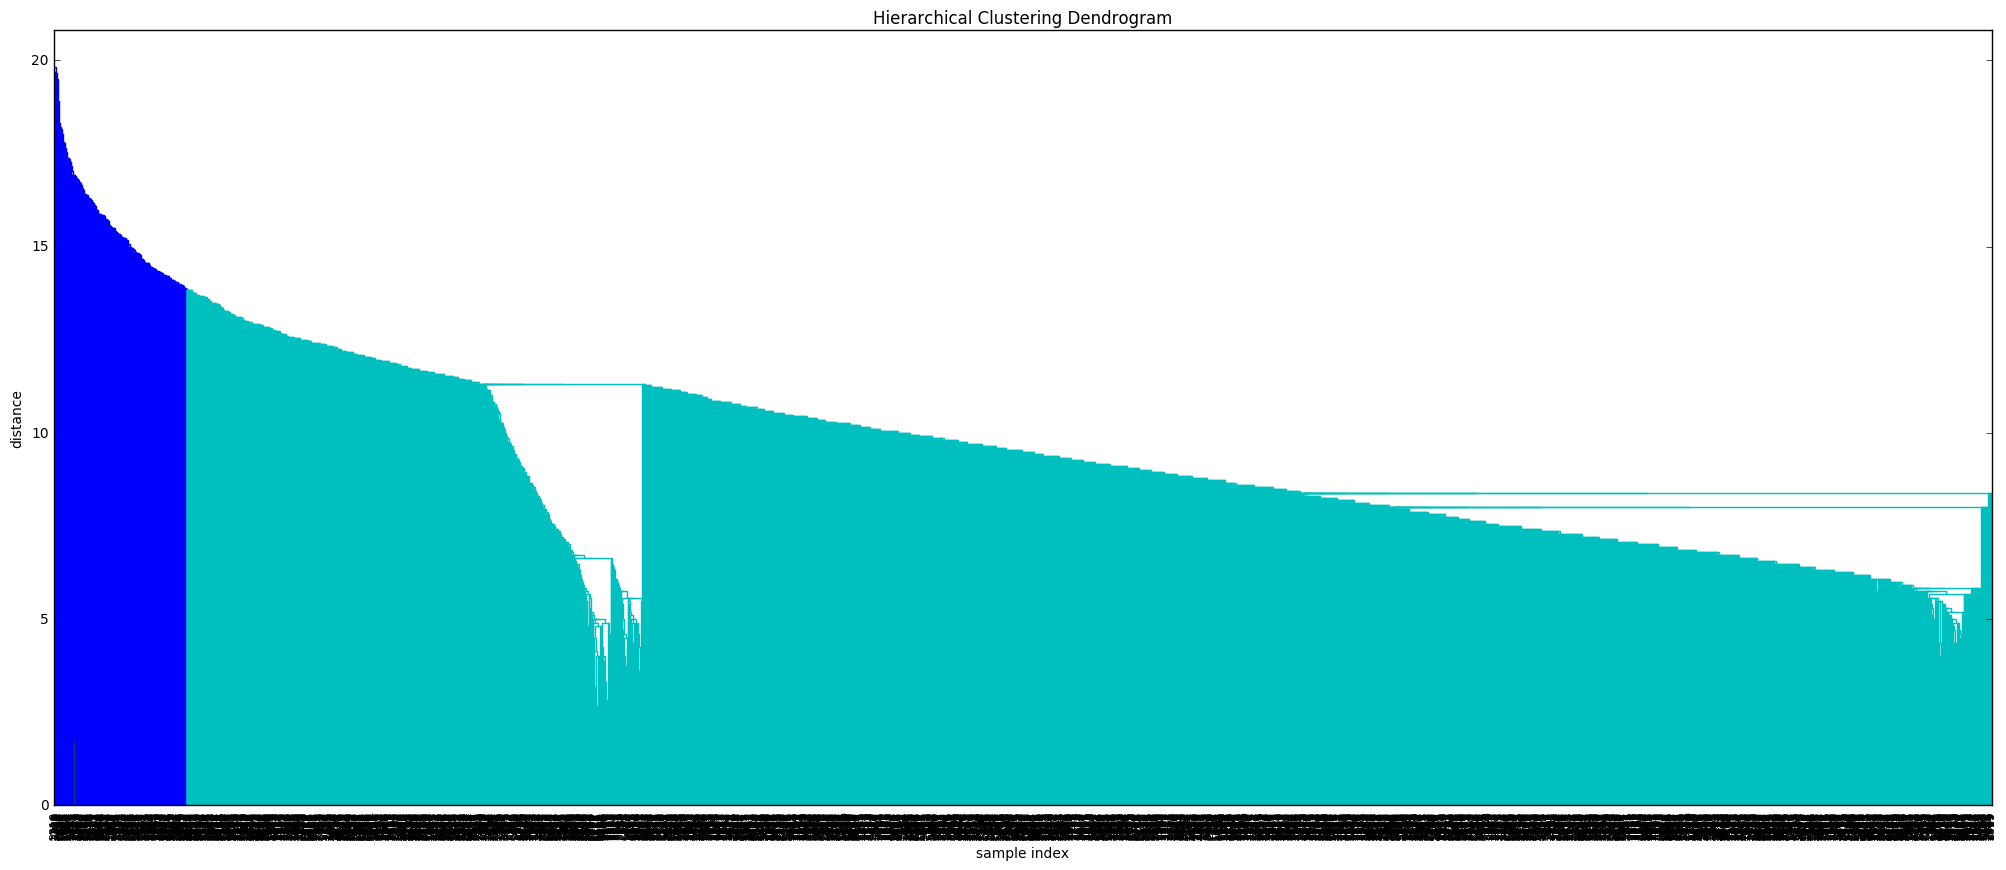

In [11]:
calcularClusteringJerarquico(documentsFrec)

<IPython.core.display.Javascript object>


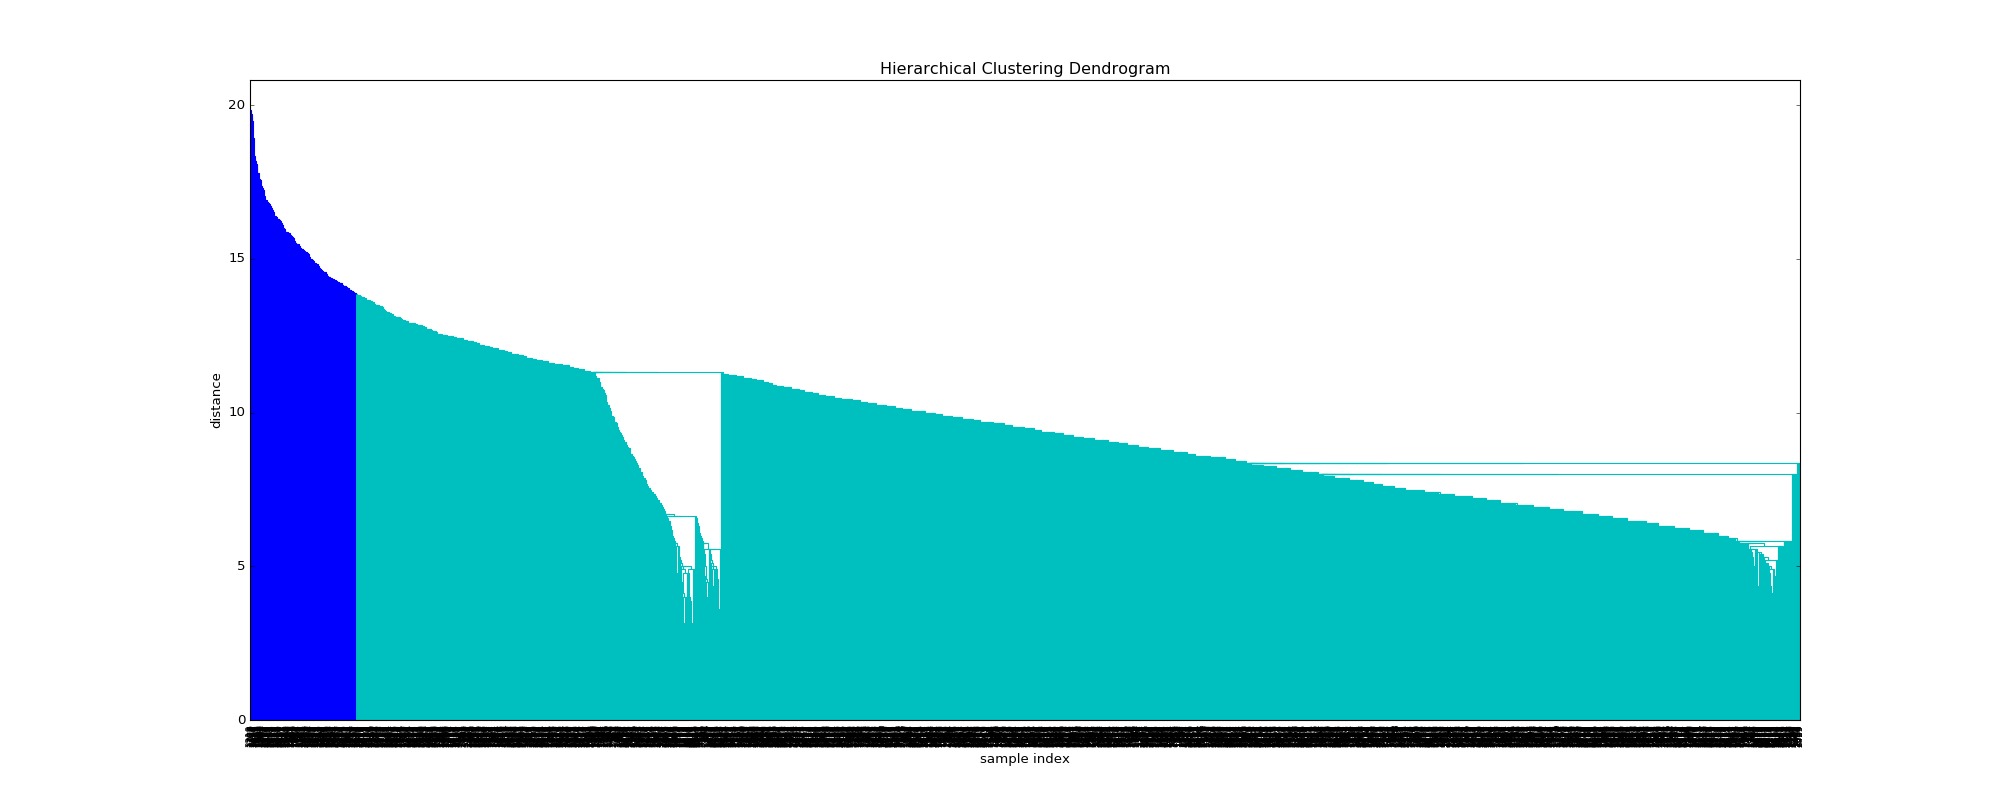

array([[  2.37700000e+03,   2.37800000e+03,   1.73205081e+00,
          2.00000000e+00],
       [  1.61300000e+03,   1.62600000e+03,   2.23606798e+00,
          2.00000000e+00],
       [  2.03600000e+03,   2.27600000e+03,   2.23606798e+00,
          2.00000000e+00],
       ..., 
       [  1.19600000e+03,   6.85500000e+03,   1.96723156e+01,
          3.42800000e+03],
       [  1.73800000e+03,   6.85600000e+03,   1.96977156e+01,
          3.42900000e+03],
       [  3.21900000e+03,   6.85700000e+03,   1.98242276e+01,
          3.43000000e+03]])

In [74]:
calcularClusteringJerarquico(documentsFrec100)

Como puede observarse en los gráficos generados, éstos son muy difíciles de leer debido a que el número de ejemplos y el número de variables es demasiado grande. Es por esto que se va a proceder a truncar los dendogramas. Aún así puede intuirse una forma parecida entre todos los dendogramas en cuanto a la distancia de entre los clusteres.
El método dendogram de la librería scipy permite elegir cómo truncarlo mediante el parámetro truncate. En este caso se va a truncar el dendograma hasta el nivel 10.

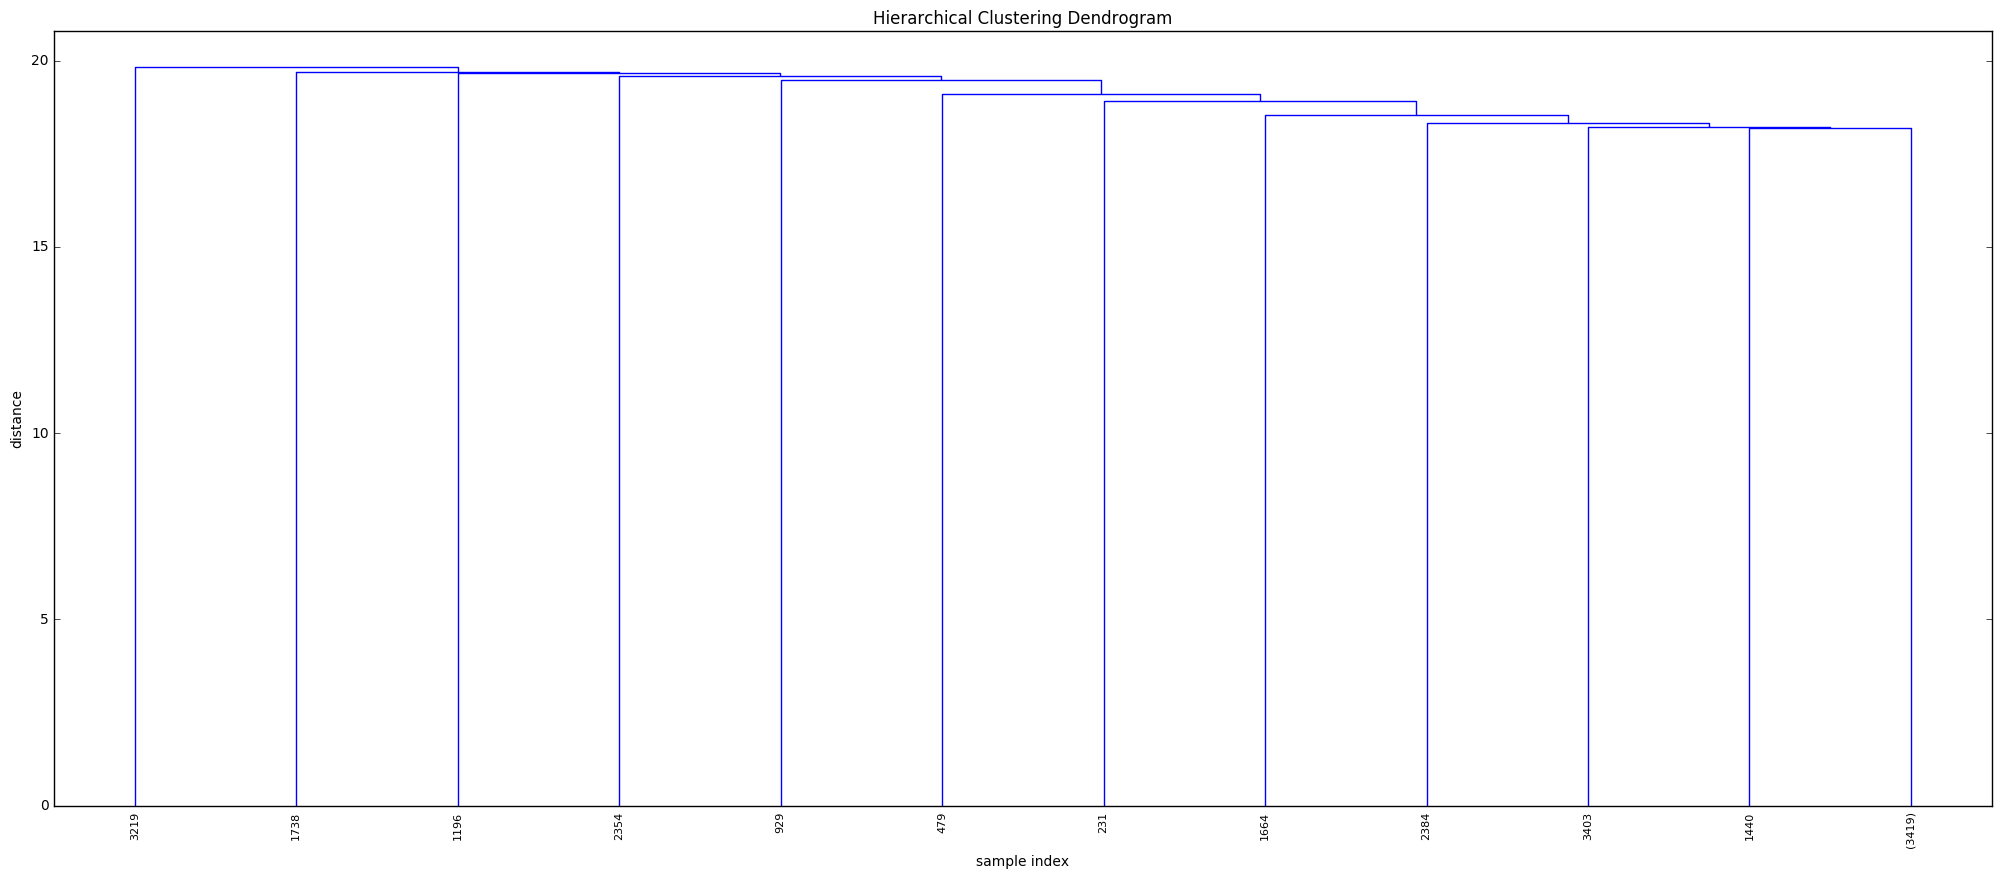

In [35]:
ZBin = calcularClusteringJerarquico(documentsBin, 'mtica', 10)

<IPython.core.display.Javascript object>


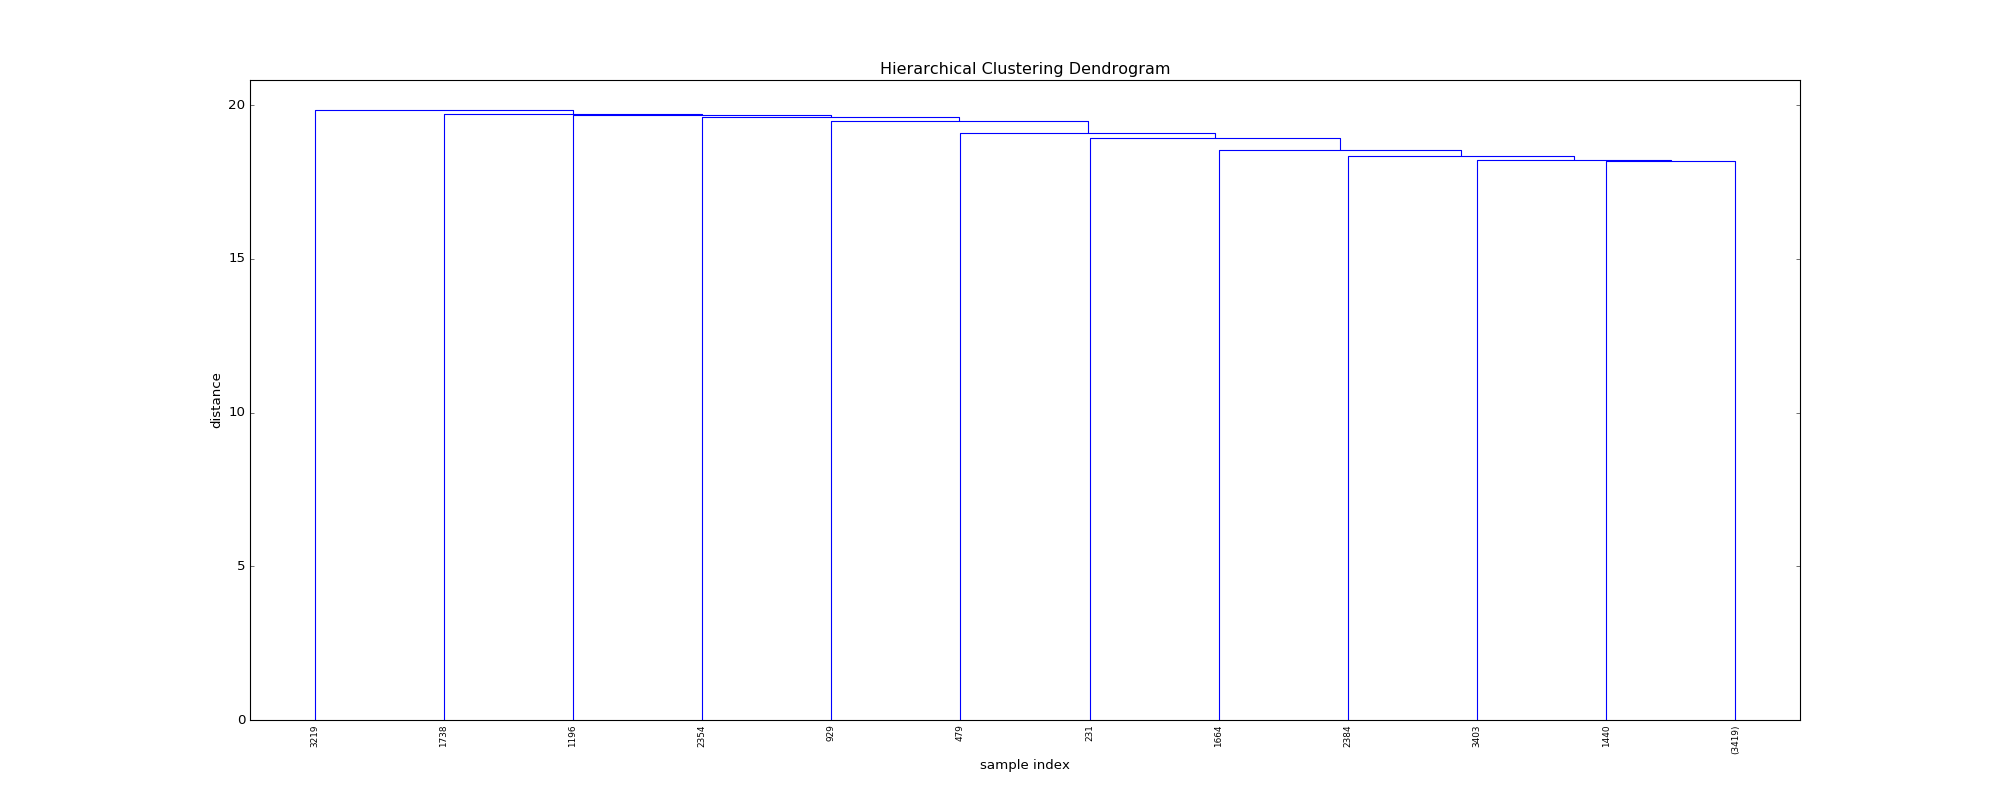

In [75]:
ZBin100 = calcularClusteringJerarquico(documentsBin100, 'mtica', 10)

<IPython.core.display.Javascript object>


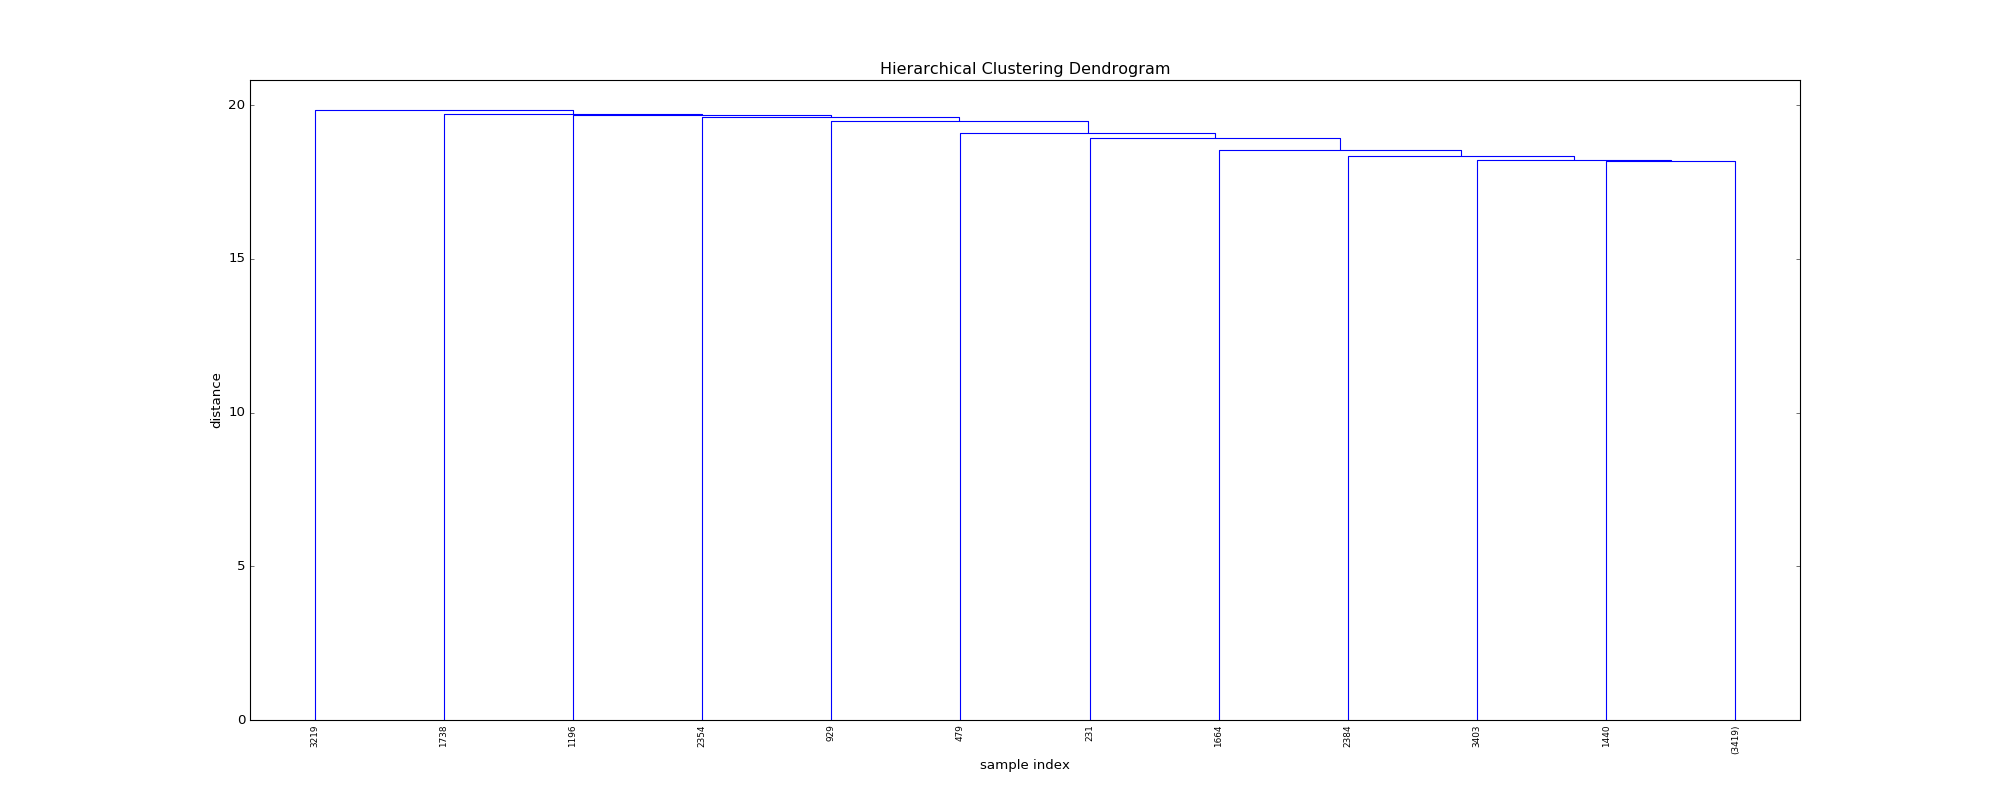

In [80]:
ZFrec = calcularClusteringJerarquico(documentsFrec, 'mtica', 10)

<IPython.core.display.Javascript object>


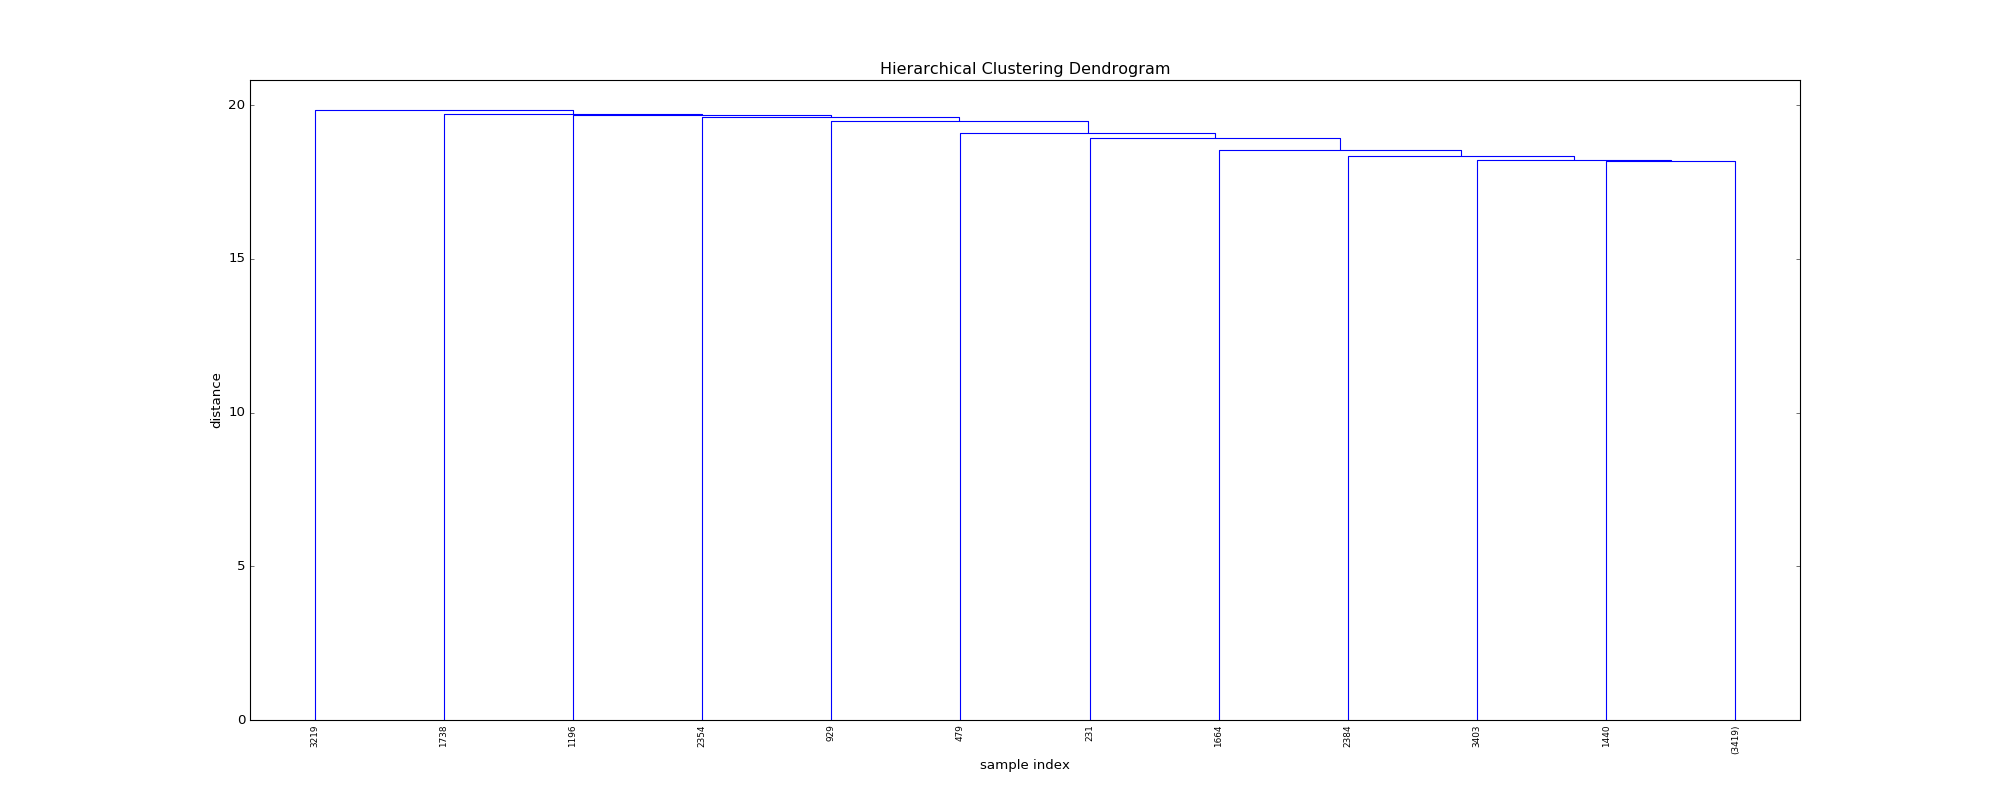

In [76]:
ZFrec100 = calcularClusteringJerarquico(documentsFrec100, 'mtica', 10)

Como puede verse en todos los dendogramas truncados al nivel 10, puede apreciarse que éstos son iguales.

### Evaluación Clustering Aglomerativo


In [38]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

K = 4

def evaluarClustersAglo(nombre, documentos, prediccion):
    print('Medida silueta-',nombre,":",silhouette_score(documentos,prediccion))
    print('Indice Calinski-Harabasz-',nombre,":",calinski_harabaz_score(documentos, prediccion))

In [78]:
evaluarClustersAglo('bin', documentsBin[0:3429,:], ZBin[:,K-1])

Medida silueta- bin : -0.0526014439978
Indice Calinski-Harabasz- bin : 1.06392195584


In [77]:
evaluarClustersAglo('bin100', documentsBin100[0:3429,:], ZBin100[:,K-1])

Medida silueta- bin100 : -0.0803718047986
Indice Calinski-Harabasz- bin100 : 1.1136142779


In [82]:
evaluarClustersAglo('frec', documentsFrec[0:3429,:], ZFrec[:,K-1])

Medida silueta- frec : -0.0648826484
Indice Calinski-Harabasz- frec : 1.07269735612


In [81]:
evaluarClustersAglo('frec100', documentsFrec100[0:3429,:], ZFrec100[:,K-1])

Medida silueta- frec100 : -0.0990252761563
Indice Calinski-Harabasz- frec100 : 1.11379040943


Como puede observarse, los resultados arrojados por este algoritmo son bastante peores que los obtenidos mediante el algoritmo K-means.
Además, no se observan diferencias significativas entre los diferentes conjuntos de datos.

## Agrupamiento espectral
Las técnicas de agrupamiento espectral transforman el conjunto de datos de entrenamiento y lo representan en espacios alternativos donde se simplifica la identificación de los distintos clústeres sea cual sea su forma.
Además, parece haber un problema con la librería y sólo se puede ejecutar este algoritmo sobre las versiones reducidas, ya que una de las operaciones producia el error "leading minor not positive definite".

In [4]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import spectral_clustering

def runSpectralClustering(k, knn, documents):
    clustering = SpectralClustering(
        n_clusters = k, 
        affinity = 'nearest_neighbors', 
        n_neighbors = knn,
        random_state = 0).fit(documents)
    return clustering

In [5]:
clustBin100 = runSpectralClustering(4,2,documentsBin100)

C:\Phyton\WinPython-64bit-3.4.4.5Qt5\python-3.4.4.amd64\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [6]:
clustFrec100 = runSpectralClustering(4,2,documentsFrec100)

C:\Phyton\WinPython-64bit-3.4.4.5Qt5\python-3.4.4.amd64\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [8]:
def mostrarClusters(labels):
    clusters = {}
    for index, elem in enumerate(labels):
        if elem not in clusters:
            clusters[elem] = []
        clusters[elem].append(index)
    for cluster, documents in clusters.items():
        print("El cluster ",cluster," tiene ",len(documents)," elementos: ",documents)

In [9]:
mostrarClusters(clustBin100.labels_)

El cluster  0  tiene  3266  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [10]:
mostrarClusters(clustFrec100.labels_)

El cluster  0  tiene  2836  elementos:  [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 70, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96, 99, 100, 103, 104, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 25

### Evaluación Clustering Espectral 

In [16]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

def evaluarClustersEspectral(nombre, documentos, prediccion):
    print('Medida silueta-',nombre,":",silhouette_score(documentos,prediccion))
    print('Indice Calinski-Harabasz-',nombre,":",calinski_harabaz_score(documentos, prediccion))

In [17]:
evaluarClustersEspectral("bin100",documentsBin100, clustBin100.labels_)

Medida silueta- bin100 : -0.25835453294
Indice Calinski-Harabasz- bin100 : 1.47261966725


In [18]:
evaluarClustersEspectral("frec100",documentsFrec100, clustFrec100.labels_)

Medida silueta- frec100 : -0.132060904379
Indice Calinski-Harabasz- frec100 : 4.01702008778


En este caso, como puede verse por los resultados de las evaluaciones, arroja mejores resultados utilizar el vector de frecuencias que utilizar el vector binario.

## Clustering Basado en Densidad - DBScan
Estos algoritmos surgen de la necesidad de encontrar agrupamientos de formas diversas. Se basan en la ides de descubrir subconjuntos d e datos que, sea cual sea la forma que proyectan, tienen cierta continuidad a lo largo del espacio. La continuidad se define en términos de densidad de ejemplos: un clúster es un conjunto denso representado en un área del espacio de los datos y rodeado por áreas menos densamente pobladas. Mediante esta idea se construyeron técnicas en que el número de clústeres no se desinga a priori sino que se descubre.
En este apartado se va a estudiar el algoritmo DBSCan mediante la implementación de la librería de sklearn.
Este algoritmo se basa en dos parámetros:
- Epsilon: fija el umbral que permite definir el vecindario de un ejemplo.
- M: El número mínimo de ejemplos que debe tener el vecindario de un elemento para ser considerado un punto nuclear.

Se van a realizar pruebas sobre los diferentes datasets modificando ligeramente dichos parámetros para comprobar los resultados.
Pruebas previas han demostrado que los casos están demasiado alejados entre ellos, por lo que es necesario utilizar valores de épsilon relativamente grandes, y un número M pequeño para que no los detecte todos como ruido.

In [9]:
from sklearn.cluster import DBSCAN

def clusteringDBScan(e,M, documents):
    return DBSCAN(eps = e, min_samples=M).fit(documents)

In [31]:
clustBinE10M10 = clusteringDBScan(10,10,documentsBin)

In [32]:
clustBinE10M5 = clusteringDBScan(10,5,documentsBin)

In [33]:
clustBinE20M15 = clusteringDBScan(20,15,documentsBin)

In [34]:
clustBin100E10M10 = clusteringDBScan(10,10,documentsBin100)

In [35]:
clustBin100E10M5 = clusteringDBScan(10,5,documentsBin100)

In [36]:
clustBin100E20M15 = clusteringDBScan(20,15,documentsBin100)

In [47]:
clustFrecE10M10 = clusteringDBScan(10,10,documentsFrec)

In [48]:
clustFrecE10M5 = clusteringDBScan(10,5,documentsFrec)

In [49]:
clustFrecE20M15 = clusteringDBScan(20,15,documentsFrec)

In [50]:
clustFrec100E10M10 = clusteringDBScan(10,10,documentsFrec100)

In [51]:
clustFrec100E10M5 = clusteringDBScan(10,5,documentsFrec100)

In [52]:
clustFrec100E20M15 = clusteringDBScan(20,15,documentsFrec100)

In [21]:
def mostrarClusters(labels):
    clusters = {}
    for index, elem in enumerate(labels):
        if elem not in clusters:
            clusters[elem] = []
        clusters[elem].append(index)
    for cluster, documents in clusters.items():
        print("El cluster ",cluster," tiene ",len(documents)," elementos: ",documents)

In [37]:
mostrarClusters(clustBinE10M10.labels_)

El cluster  0  tiene  1936  elementos:  [1, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 39, 40, 41, 42, 43, 45, 46, 47, 48, 51, 52, 54, 55, 56, 60, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 74, 76, 78, 80, 82, 83, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 115, 116, 118, 121, 122, 124, 126, 127, 129, 130, 134, 135, 139, 142, 145, 146, 148, 149, 151, 152, 153, 154, 155, 157, 158, 161, 163, 164, 165, 166, 167, 168, 171, 172, 173, 175, 176, 177, 178, 179, 183, 187, 188, 190, 192, 195, 198, 199, 204, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 228, 233, 234, 235, 236, 237, 238, 240, 242, 243, 245, 246, 248, 249, 253, 254, 256, 257, 258, 259, 262, 264, 265, 266, 267, 270, 274, 276, 277, 278, 279, 281, 282, 284, 285, 286, 288, 289, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311, 312, 317, 318, 321, 322, 323, 325, 326,

In [38]:
mostrarClusters(clustBinE10M5.labels_)

El cluster  0  tiene  1936  elementos:  [1, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 39, 40, 41, 42, 43, 45, 46, 47, 48, 51, 52, 54, 55, 56, 60, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 74, 76, 78, 80, 82, 83, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 115, 116, 118, 121, 122, 124, 126, 127, 129, 130, 134, 135, 139, 142, 145, 146, 148, 149, 151, 152, 153, 154, 155, 157, 158, 161, 163, 164, 165, 166, 167, 168, 171, 172, 173, 175, 176, 177, 178, 179, 183, 187, 188, 190, 192, 195, 198, 199, 204, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 228, 233, 234, 235, 236, 237, 238, 240, 242, 243, 245, 246, 248, 249, 253, 254, 256, 257, 258, 259, 262, 264, 265, 266, 267, 270, 274, 276, 277, 278, 279, 281, 282, 284, 285, 286, 288, 289, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311, 312, 317, 318, 321, 322, 323, 325, 326,

In [39]:
mostrarClusters(clustBinE20M15.labels_)

El cluster  0  tiene  3430  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [41]:
mostrarClusters(clustBin100E10M10.labels_)

El cluster  0  tiene  3413  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [42]:
mostrarClusters(clustBin100E10M5.labels_)

El cluster  0  tiene  3413  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [43]:
mostrarClusters(clustBin100E20M15.labels_)

El cluster  0  tiene  3430  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

In [45]:
mostrarClusters(clustFrecE05M20.labels_)

El cluster  -1  tiene  3430  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213

In [53]:
mostrarClusters(clustFrecE10M10.labels_)

El cluster  0  tiene  138  elementos:  [2, 12, 34, 79, 112, 147, 162, 202, 232, 241, 320, 364, 376, 397, 408, 468, 492, 528, 539, 605, 618, 650, 686, 732, 766, 777, 791, 800, 813, 857, 901, 912, 915, 926, 1011, 1023, 1026, 1060, 1072, 1145, 1169, 1218, 1228, 1266, 1291, 1351, 1363, 1375, 1387, 1389, 1400, 1411, 1470, 1505, 1520, 1545, 1565, 1592, 1613, 1614, 1626, 1656, 1668, 1679, 1692, 1702, 1716, 1728, 1739, 1762, 1771, 1824, 1836, 1884, 1906, 1917, 1957, 1993, 2005, 2014, 2036, 2084, 2118, 2159, 2187, 2198, 2210, 2220, 2233, 2245, 2266, 2276, 2304, 2338, 2361, 2374, 2385, 2397, 2409, 2424, 2449, 2485, 2531, 2557, 2567, 2589, 2624, 2635, 2645, 2658, 2672, 2728, 2752, 2772, 2786, 2819, 2828, 2861, 2882, 2913, 2936, 2971, 3005, 3040, 3073, 3084, 3095, 3107, 3110, 3143, 3166, 3210, 3223, 3238, 3268, 3287, 3296, 3376]
El cluster  1  tiene  953  elementos:  [5, 7, 9, 13, 16, 17, 20, 21, 24, 28, 32, 33, 36, 43, 48, 51, 52, 54, 55, 56, 62, 63, 64, 66, 71, 72, 73, 78, 90, 95, 98, 101, 102, 

In [54]:
mostrarClusters(clustFrecE10M5.labels_)

El cluster  0  tiene  138  elementos:  [2, 12, 34, 79, 112, 147, 162, 202, 232, 241, 320, 364, 376, 397, 408, 468, 492, 528, 539, 605, 618, 650, 686, 732, 766, 777, 791, 800, 813, 857, 901, 912, 915, 926, 1011, 1023, 1026, 1060, 1072, 1145, 1169, 1218, 1228, 1266, 1291, 1351, 1363, 1375, 1387, 1389, 1400, 1411, 1470, 1505, 1520, 1545, 1565, 1592, 1613, 1614, 1626, 1656, 1668, 1679, 1692, 1702, 1716, 1728, 1739, 1762, 1771, 1824, 1836, 1884, 1906, 1917, 1957, 1993, 2005, 2014, 2036, 2084, 2118, 2159, 2187, 2198, 2210, 2220, 2233, 2245, 2266, 2276, 2304, 2338, 2361, 2374, 2385, 2397, 2409, 2424, 2449, 2485, 2531, 2557, 2567, 2589, 2624, 2635, 2645, 2658, 2672, 2728, 2752, 2772, 2786, 2819, 2828, 2861, 2882, 2913, 2936, 2971, 3005, 3040, 3073, 3084, 3095, 3107, 3110, 3143, 3166, 3210, 3223, 3238, 3268, 3287, 3296, 3376]
El cluster  1  tiene  956  elementos:  [5, 7, 9, 13, 16, 17, 20, 21, 24, 28, 32, 33, 36, 43, 48, 51, 52, 54, 55, 56, 62, 63, 64, 66, 71, 72, 73, 78, 90, 95, 98, 101, 102, 

In [55]:
mostrarClusters(clustFrecE20M15.labels_)

El cluster  0  tiene  2964  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 186, 187, 188, 190, 191, 192, 193, 195, 196, 198, 199, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 230, 232, 233,

In [56]:
mostrarClusters(clustFrec100E10M10.labels_)

El cluster  0  tiene  2701  elementos:  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 187, 188, 190, 191, 192, 195, 196, 198, 199, 201, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 224, 225, 226, 227, 228, 233, 234, 235, 236, 237, 238, 240, 242, 243, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 

In [57]:
mostrarClusters(clustFrec100E10M5.labels_)

El cluster  0  tiene  2712  elementos:  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 183, 185, 187, 188, 190, 191, 192, 195, 196, 198, 199, 201, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 224, 225, 226, 227, 228, 233, 234, 235, 236, 237, 238, 240, 242, 243, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 

In [58]:
mostrarClusters(clustFrec100E20M15.labels_)

El cluster  0  tiene  3374  elementos:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 195, 196, 197, 198, 199, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

Se puede apreciar como conforme se aumenta el valor de épsilon, el número de clusteres disminuye, haciendo en algunos casos que todo el conjunto de datos pertenezca a un único clúster al final.

### Evaluación DBScan
A continuación se procederá a realizar la evaluación de aquellas ejecuciones que devolvieron más de un clúster.

In [60]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

def evaluarClustersDBScan(nombre, documentos, prediccion):
    print('Medida silueta-',nombre,":",silhouette_score(documentos,prediccion))
    print('Indice Calinski-Harabasz-',nombre,":",calinski_harabaz_score(documentos, prediccion))

In [73]:
evaluarClustersDBScan("bin e=10, M=10 ",documentsBin, clustBinE10M10.labels_)

Medida silueta- bin e=10, M=10  : 0.106484904001
Indice Calinski-Harabasz- bin e=10, M=10  : 129.297487161


In [74]:
evaluarClustersDBScan("bin e=10, M=5 ",documentsBin, clustBinE10M5.labels_)

Medida silueta- bin e=10, M=5  : 0.106484904001
Indice Calinski-Harabasz- bin e=10, M=5  : 129.297487161


In [83]:
evaluarClustersDBScan("bin100 e=10, M=10 ",documentsBin100, clustBin100E10M10.labels_)

Medida silueta- bin100 e=10, M=10  : 0.49869577367
Indice Calinski-Harabasz- bin100 e=10, M=10  : 20.2474988963


In [76]:
evaluarClustersDBScan("bin100 e=10, M=5 ",documentsBin100, clustBin100E10M5.labels_)

Medida silueta- bin100 e=10, M=5  : 0.49869577367
Indice Calinski-Harabasz- bin100 e=10, M=5  : 20.2474988963


In [77]:
evaluarClustersDBScan("frec e=10, M=10 ",documentsFrec, clustFrecE10M10.labels_)

Medida silueta- frec e=10, M=10  : -0.0435786768184
Indice Calinski-Harabasz- frec e=10, M=10  : 71.5928213177


In [78]:
evaluarClustersDBScan("frec e=10, M=5 ",documentsFrec, clustFrecE10M5.labels_)

Medida silueta- frec e=10, M=5  : -0.0430755566242
Indice Calinski-Harabasz- frec e=10, M=5  : 71.6556702946


In [79]:
evaluarClustersDBScan("frec e=20, M=5 ",documentsFrec, clustFrecE20M15.labels_)

Medida silueta- frec e=20, M=5  : 0.316200874339
Indice Calinski-Harabasz- frec e=20, M=5  : 51.7666078477


In [80]:
evaluarClustersDBScan("frec100 e=10, M=10 ",documentsFrec100, clustFrec100E10M10.labels_)

Medida silueta- frec100 e=10, M=10  : 0.364493164755
Indice Calinski-Harabasz- frec100 e=10, M=10  : 331.887031665


In [81]:
evaluarClustersDBScan("frec100 e=10, M=5 ",documentsFrec100, clustFrec100E10M5.labels_)

Medida silueta- frec100 e=10, M=5  : 0.36532680219
Indice Calinski-Harabasz- frec100 e=10, M=5  : 331.861678632


In [84]:
evaluarClustersDBScan("frec100 e=20, M=15 ",documentsFrec100, clustFrec100E20M15.labels_)

Medida silueta- frec100 e=20, M=15  : 0.615213779774
Indice Calinski-Harabasz- frec100 e=20, M=15  : 47.9566957791


Se puede apreciar cómo la variación de los parámetros no afecta a la evaluación en el caso de los vectores binarios, tanto en su tamaño original como en el reducido.
En el caso del vector de frecuencias, se puede apreciar cómo aumentando el valor de epsilon mejora la medida de la silueta. Sin embargo, si se aumenta demasiado, disminuye el valor del índice Calinski-Harabasz.


## Clustering Basado en modelos probabilísticos - Mixturas Gausianas
Estos algoritmos asumen la existencia de un modelo probabilístico a partir del cual se han generado los datos observados. Este tipo de algoritmos intentan encontrar, a partir de un conjunto de datos de entrenamiento, el mejor ajuste del modelo generados que se esté asumiento.

In [94]:
from sklearn.mixture import GaussianMixture

def generarModelo(numeroComponentes, documents):
    modelo = GaussianMixture(n_components=numeroComponentes,max_iter=200,covariance_type='spherical').fit(documents)
    return modelo.predict(documents)

In [95]:
clusterBin = generarModelo(3, documentsBin)

In [96]:
clusterBin100 = generarModelo(4, documentsBin100)

In [97]:
clusterFrec = generarModelo(6, documentsFrec)

In [98]:
clusterFrec100 = generarModelo(4, documentsFrec100)

In [99]:
def mostrarClusters(labels):
    clusters = {}
    for index, elem in enumerate(labels):
        if elem not in clusters:
            clusters[elem] = []
        clusters[elem].append(index)
    for cluster, documents in clusters.items():
        print("El cluster ",cluster," tiene ",len(documents)," elementos: ",documents)

In [101]:
mostrarClusters(clusterBin)

El cluster  0  tiene  1599  elementos:  [0, 3, 4, 14, 15, 18, 19, 22, 25, 29, 31, 35, 37, 38, 39, 41, 42, 47, 49, 50, 53, 58, 59, 60, 65, 69, 72, 75, 77, 81, 82, 83, 84, 85, 92, 94, 103, 104, 105, 113, 114, 116, 117, 119, 120, 123, 131, 132, 133, 136, 137, 138, 141, 143, 144, 151, 155, 156, 159, 160, 161, 165, 169, 170, 172, 179, 180, 181, 182, 184, 185, 189, 191, 194, 196, 197, 200, 201, 203, 205, 206, 209, 221, 224, 226, 229, 231, 238, 239, 244, 245, 247, 250, 252, 255, 257, 260, 262, 263, 266, 268, 269, 272, 273, 274, 275, 283, 287, 290, 292, 293, 294, 297, 300, 303, 308, 312, 313, 314, 315, 316, 319, 323, 324, 327, 329, 331, 335, 336, 340, 341, 343, 344, 345, 346, 350, 351, 354, 355, 358, 359, 362, 363, 368, 372, 373, 377, 378, 381, 382, 383, 388, 389, 392, 394, 395, 396, 398, 400, 401, 403, 404, 405, 406, 407, 410, 411, 414, 416, 417, 423, 426, 428, 429, 430, 431, 433, 441, 442, 443, 450, 452, 454, 456, 461, 464, 465, 466, 467, 469, 470, 473, 474, 478, 479, 481, 484, 485, 486, 487

In [102]:
mostrarClusters(clusterBin100)

El cluster  0  tiene  1579  elementos:  [1, 3, 5, 6, 7, 8, 9, 10, 13, 16, 17, 18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 32, 33, 35, 36, 40, 42, 43, 45, 46, 47, 48, 51, 52, 54, 55, 56, 60, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 74, 76, 78, 80, 81, 82, 84, 86, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 100, 101, 102, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 121, 122, 124, 126, 127, 129, 130, 132, 133, 134, 135, 139, 141, 142, 144, 145, 146, 148, 149, 151, 152, 153, 154, 157, 158, 161, 163, 164, 165, 166, 167, 168, 172, 173, 175, 176, 177, 178, 179, 183, 187, 188, 190, 192, 195, 198, 199, 204, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 228, 233, 234, 235, 236, 237, 240, 242, 243, 246, 247, 248, 249, 253, 254, 256, 257, 258, 259, 264, 265, 267, 270, 274, 275, 276, 277, 278, 279, 281, 284, 285, 286, 288, 289, 295, 296, 298, 299, 300, 302, 304, 305, 306, 307, 309, 311, 317, 318, 321, 322, 323, 325, 326, 327, 328, 334, 336, 337, 338, 339

In [103]:
mostrarClusters(clusterFrec)

El cluster  0  tiene  10  elementos:  [14, 449, 488, 532, 557, 564, 591, 613, 636, 657]
El cluster  1  tiene  254  elementos:  [2, 12, 34, 57, 68, 79, 89, 99, 112, 125, 128, 140, 147, 150, 162, 186, 193, 202, 211, 219, 230, 232, 241, 251, 261, 271, 280, 291, 320, 333, 342, 352, 364, 376, 387, 397, 408, 448, 457, 468, 492, 504, 515, 528, 539, 565, 579, 592, 605, 618, 628, 641, 650, 673, 686, 732, 743, 755, 766, 777, 791, 800, 813, 824, 834, 846, 857, 867, 901, 912, 915, 926, 936, 945, 956, 1011, 1023, 1026, 1049, 1060, 1072, 1084, 1108, 1132, 1142, 1145, 1156, 1169, 1181, 1194, 1206, 1218, 1228, 1263, 1266, 1278, 1288, 1291, 1338, 1351, 1363, 1375, 1387, 1389, 1400, 1411, 1431, 1457, 1470, 1482, 1494, 1505, 1520, 1532, 1545, 1556, 1565, 1584, 1592, 1613, 1614, 1626, 1645, 1656, 1668, 1679, 1692, 1702, 1716, 1728, 1730, 1739, 1751, 1762, 1771, 1780, 1802, 1812, 1824, 1836, 1839, 1862, 1872, 1884, 1894, 1906, 1917, 1942, 1957, 1968, 1993, 2005, 2014, 2025, 2036, 2046, 2058, 2069, 2084, 20

In [104]:
mostrarClusters(clusterFrec100)

El cluster  0  tiene  1076  elementos:  [9, 10, 13, 16, 17, 20, 21, 24, 28, 29, 32, 33, 36, 41, 43, 45, 46, 47, 48, 51, 52, 54, 55, 62, 63, 66, 70, 72, 73, 74, 78, 80, 81, 82, 86, 88, 90, 91, 94, 95, 98, 101, 102, 107, 108, 109, 110, 111, 115, 118, 121, 122, 124, 126, 129, 135, 139, 142, 148, 149, 152, 153, 154, 157, 158, 163, 164, 167, 168, 176, 177, 178, 187, 188, 190, 198, 204, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 225, 226, 227, 234, 237, 240, 243, 246, 247, 248, 249, 253, 254, 256, 258, 259, 265, 267, 270, 274, 275, 277, 278, 279, 281, 286, 288, 289, 295, 296, 298, 302, 304, 305, 306, 307, 311, 317, 318, 321, 322, 323, 325, 327, 328, 334, 336, 337, 338, 339, 344, 347, 348, 349, 356, 357, 360, 367, 368, 375, 380, 381, 386, 391, 393, 402, 409, 415, 418, 419, 420, 422, 425, 432, 436, 441, 444, 446, 447, 451, 455, 458, 459, 463, 466, 467, 471, 472, 475, 477, 482, 483, 490, 495, 501, 505, 508, 510, 513, 514, 516, 517, 522, 523, 524, 526, 535, 536, 537, 540, 5

### Evaluación Mixturas Gaussianas

In [105]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

def evaluarClustersDBScan(nombre, documentos, prediccion):
    print('Medida silueta-',nombre,":",silhouette_score(documentos,prediccion))
    print('Indice Calinski-Harabasz-',nombre,":",calinski_harabaz_score(documentos, prediccion))

In [106]:
evaluarClustersDBScan('bin',documentsBin, clusterBin)

Medida silueta- bin : 0.0521869080334
Indice Calinski-Harabasz- bin : 167.677481774


In [107]:
evaluarClustersDBScan('bin100',documentsBin100, clusterBin100)

Medida silueta- bin100 : 0.0262868412678
Indice Calinski-Harabasz- bin100 : 478.548897437


In [108]:
evaluarClustersDBScan('frec',documentsFrec, clusterFrec)

Medida silueta- frec : -0.0309304899152
Indice Calinski-Harabasz- frec : 60.4347333834


In [109]:
evaluarClustersDBScan('frec100',documentsFrec100, clusterFrec100)

Medida silueta- frec100 : 0.0331205984616
Indice Calinski-Harabasz- frec100 : 249.259403521


En este caso se puede observar cómo aquella predicción que obtiene mejor valor para la medida silueta es aquella generada por el vector binario, mientras que la que obtiene mejor valor para el indice C-H es la del vector binario reducido.